In [1]:
import vcf
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binned_statistic

In [5]:
os.chdir('/master/nplatt/sm_nanopore/results/cutesv')

In [87]:
os.chdir('/master/nplatt/sm_nanopore/results/n50')

#read in lens and make plot
f2f = "schisto_2_9_2022_filtered.lens"
f1 = "schisto_1_2_2_2022_filtered.lens"
f3 = "schisto_frozen_2_12_22_filtered.lens"
f4 = "schisto_pairs_04132022_filtered.lens"
f2u = "schisto_2_9_2022.lens"

In [90]:
f2fs=np.loadtxt(f2f) 
f2us=np.loadtxt(f2u) 
f1s=np.loadtxt(f1) 
f3s=np.loadtxt(f3) 
f4s=np.loadtxt(f4)

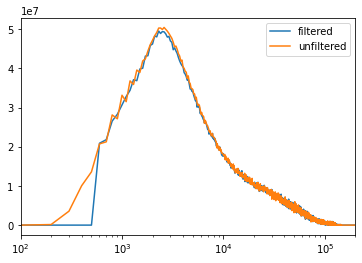

In [98]:
sums, edges, other = binned_statistic(f2fs, f2fs, statistic='sum', bins=list(range(0, 200000, 100)), range=(0, 200_000))
plt.plot(edges[1:], sums, label="filtered")
sums, edges, other = binned_statistic(f2us, f2us, statistic='sum', bins=list(range(0, 200000, 100)), range=(0, 200_000))
plt.plot(edges[1:], sums, label="unfiltered")
plt.xscale('log')
plt.xlim([100, 200_000])
#plt.yscale('log')
plt.legend()
plt.show()

In [14]:
sums, edges, other = binned_statistic(f2fs, f2fs, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_1_2_2_2022")
sums, edges, other = binned_statistic(f2s, f2s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_2_9_2022")
sums, edges, other = binned_statistic(f3s, f3s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_frozen_2_12_22")
sums, edges, other = binned_statistic(f4s, f4s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_pairs_04132022")
plt.xscale('log')
plt.xlim([100, 200_000])
#plt.yscale('log')
plt.legend()
plt.show()

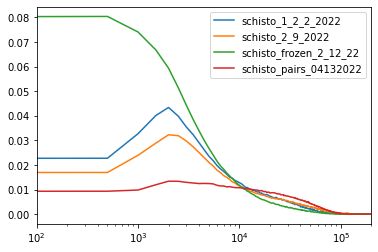

In [85]:
sums, edges, other = binned_statistic(f1s, f1s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_1_2_2_2022")
sums, edges, other = binned_statistic(f2s, f2s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_2_9_2022")
sums, edges, other = binned_statistic(f3s, f3s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_frozen_2_12_22")
sums, edges, other = binned_statistic(f4s, f4s, statistic='sum', bins=list(range(0, 200000, 500)), range=(0, 200_000))
plt.plot(edges[0:-1], sums/sums.sum(), label="schisto_pairs_04132022")
plt.xscale('log')
plt.xlim([100, 200_000])
#plt.yscale('log')
plt.legend()
plt.show()

In [81]:
sums

array([0.00000000e+00, 1.25953775e+08, 1.32427284e+08, 1.61427719e+08,
       1.81072463e+08, 1.80531924e+08, 1.74713073e+08, 1.71229429e+08,
       1.68068323e+08, 1.68737536e+08, 1.68205363e+08, 1.66295637e+08,
       1.58640017e+08, 1.54876596e+08, 1.54667980e+08, 1.49821320e+08,
       1.50932556e+08, 1.48746080e+08, 1.46082121e+08, 1.45698071e+08,
       1.45064747e+08, 1.43856918e+08, 1.40743216e+08, 1.42224988e+08,
       1.39117286e+08, 1.37681664e+08, 1.36196214e+08, 1.34729195e+08,
       1.33838560e+08, 1.32091615e+08, 1.32670215e+08, 1.29714592e+08,
       1.27830703e+08, 1.29785675e+08, 1.26726449e+08, 1.23283723e+08,
       1.25064102e+08, 1.20234674e+08, 1.20278876e+08, 1.21260072e+08,
       1.16308675e+08, 1.16718800e+08, 1.18248128e+08, 1.17442162e+08,
       1.17225193e+08, 1.16272221e+08, 1.13544352e+08, 1.11270988e+08,
       1.13067748e+08, 1.10357605e+08, 1.11228020e+08, 1.07052307e+08,
       1.05637364e+08, 1.06519364e+08, 1.06879083e+08, 1.00670134e+08,
      

In [ ]:


vcf_reader = vcf.Reader(filename="schisto_pairs_04132022_sorted.vcf")

for record in vcf_reader:
    
    try:
      af = float(record.INFO["AF"][0])
    except:
      af=0.0

    try:
      svtype = record.INFO["SVTYPE"]
    except:
      svtype="Na"

    try:
      svlen  = int(record.INFO["SVLEN"])
    except:
      svlen=0
    
    if abs(svlen) > 500 and af==1.0 and record.FILTER==[]:
        print(record.ID)


In [28]:
record.INFO

{'PRECISE': True,
 'SVTYPE': 'DEL',
 'SVLEN': -293,
 'END': 54055,
 'CIPOS': [-42, 42],
 'CILEN': [-11, 11],
 'RE': 10,
 'RNAMES': ['NULL'],
 'AF': [0.8333],
 'STRAND': ['+-']}

In [38]:
record.genotype.keys()

AttributeError: 'function' object has no attribute 'keys'

In [ ]:
from Bio import SeqIO

with open("example.fasta") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        print(record.id)

In [2]:
os.chdir('/master/nplatt/sm_nanopore/results/cutesv')

In [4]:
os.listdir()

['prev',
 'schisto_2_9_2022_vSM_V9_sorted.vcf',
 'schisto_frozen_2_12_22_vSM_V9_sorted.vcf',
 'schisto_pairs_04132022_vSM_V9_sorted.vcf',
 'schisto_1_2_2_2022_vSM_V9_sorted.vcf',
 'SmEG_Female_5_25_22_vSM_V9_sorted.vcf',
 'SmOR_Female_6_02_22_vSM_V9_sorted.vcf']

In [5]:
vcf_files=[ 'schisto_pairs_04132022_vSM_V9_sorted.vcf',
 'SmEG_Female_5_25_22_vSM_V9_sorted.vcf',
 'SmOR_Female_6_02_22_vSM_V9_sorted.vcf']

In [6]:

vcf_reader = vcf.Reader(filename=vcf_files[0])

for record in vcf_reader:
    
    try:
      af = float(record.INFO["AF"][0])
    except:
      af=0.0

    try:
      svtype = record.INFO["SVTYPE"]
    except:
      svtype="Na"

    try:
      svlen  = int(record.INFO["SVLEN"])
    except:
      svlen=0
    
    if abs(svlen) > 500 and record.FILTER==[]:

    #if abs(svlen) > 500 and af==1.0 and record.FILTER==[]:
        print(record.ID)


cuteSV.DUP.0
cuteSV.DUP.1
cuteSV.DUP.2
cuteSV.DUP.3
cuteSV.DUP.4
cuteSV.DUP.5
cuteSV.DUP.6
cuteSV.DUP.7
cuteSV.DEL.6
cuteSV.DEL.7
cuteSV.DEL.10
cuteSV.INV.0
cuteSV.DEL.18
cuteSV.DEL.19
cuteSV.DEL.22
cuteSV.INS.26
cuteSV.DEL.23
cuteSV.INS.29
cuteSV.INS.32
cuteSV.DEL.26
cuteSV.INS.33
cuteSV.DEL.31
cuteSV.DEL.49
cuteSV.DUP.8
cuteSV.DEL.60
cuteSV.INS.69
cuteSV.DEL.84
cuteSV.DEL.88
cuteSV.DEL.89
cuteSV.DUP.9
cuteSV.INS.70
cuteSV.INS.72
cuteSV.DUP.10
cuteSV.DEL.93
cuteSV.INS.73
cuteSV.INS.74
cuteSV.DEL.97
cuteSV.DEL.98
cuteSV.DEL.99
cuteSV.INS.75
cuteSV.INV.1
cuteSV.INV.2
cuteSV.DEL.105
cuteSV.INV.3
cuteSV.INV.4
cuteSV.DEL.107
cuteSV.DEL.109
cuteSV.DEL.110
cuteSV.DEL.111
cuteSV.DEL.112
cuteSV.DEL.113
cuteSV.INS.80
cuteSV.DEL.114
cuteSV.INS.82
cuteSV.DEL.116
cuteSV.INS.83
cuteSV.DEL.119
cuteSV.DEL.120
cuteSV.INS.86
cuteSV.DEL.123
cuteSV.DEL.124
cuteSV.DUP.12
cuteSV.DEL.125
cuteSV.INS.91
cuteSV.INS.93
cuteSV.DEL.127
cuteSV.DEL.129
cuteSV.INS.95
cuteSV.INS.96
cuteSV.DEL.131
cuteSV.INS.98
cuteSV